In [1]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install matplotlib
# !pip install -U scikit-learn
# !pip install xgboost
# !pip install lightgbm

In [66]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)
# sns.set_style("whitegrid")

# Data Definition

In [18]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [19]:
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]

In [20]:
df = pd.read_csv(
    url, 
    names=columns, 
    na_values=' ?',        # 결측치 처리 위한 구분 
    skipinitialspace=True, # 쉼표 뒤에 공백 자동 제거
)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [24]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [22]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.0000,32561.0000,32561.0000,32561.0000,32561.0000,32561.0000
mean,38.5816,189778.3665,10.0807,1077.6488,87.3038,40.4375
std,13.6404,105549.9777,2.5727,7385.2921,402.9602,12.3474
min,17.0000,12285.0000,1.0000,0.0000,0.0000,1.0000
25%,28.0000,117827.0000,9.0000,0.0000,0.0000,40.0000
50%,37.0000,178356.0000,10.0000,0.0000,0.0000,40.0000
75%,48.0000,237051.0000,12.0000,0.0000,0.0000,45.0000
max,90.0000,1484705.0000,16.0000,99999.0000,4356.0000,99.0000


# Preprocessing

### Target 컬럼 재정의

In [25]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [26]:
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
df['income'].unique()

array([0, 1])

In [27]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


### Data Type 확인

In [28]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [29]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,0,False,False,False,T

## Correlation

In [32]:
# df.corr()
df_corr = df.corr()['income'].drop('income').sort_values(key=abs, ascending=False)
df_corr.head(10)

marital-status_Married-civ-spouse    0.4447
education-num                        0.3352
marital-status_Never-married        -0.3184
age                                  0.2340
hours-per-week                       0.2297
relationship_Own-child              -0.2285
capital-gain                         0.2233
sex_Male                             0.2160
occupation_Exec-managerial           0.2149
relationship_Not-in-family          -0.1885
Name: income, dtype: float64

In [34]:
top_10_features = df_corr.head(10).index.tolist()
top_10_corr = df[top_10_features + ['income']].corr()

top_10_corr

,marital-status_Married-civ-spouse,education-num,marital-status_Never-married,age,hours-per-week,relationship_Own-child,capital-gain,sex_Male,occupation_Exec-managerial,relationship_Not-in-family,income
marital-status_Married-civ-spouse,1.0000,0.0861,-0.6449,0.3157,0.2128,-0.3801,0.0859,0.4318,0.1070,-0.5376,0.4447
education-num,0.0861,1.0000,-0.0321,0.0365,0.1481,-0.0992,0.1226,0.0123,0.2009,0.0534,0.3352
marital-status_Never-married,-0.6449,-0.0321,1.0000,-0.5344,-0.1979,0.5092,-0.0663,-0.1714,-0.1059,0.2973,-0.3184
age,0.3157,0.0365,-0.5344,1.0000,0.0688,-0.4329,0.0777,0.0888,0.0994,-0.0101,0.2340
hours-per-week,0.2128,0.1481,-0.1979,0.0688,1.0000,-0.2493,0.0784,0.2293,0.1392,0.0075,0.2297
relationship_Own-child,-0.3801,-0.0992,0.5092,-0.4329,-0.2493,1.0000,-0.0536,-0.1024,-0.1014,-0.2512,-0.2285
capital-gain,0.0859,0.1226,-0.0663,0.0777,0.0784,-0.0536,1.0000,0.0485,0.0606,-0.0265,0.2233
sex_Male,0.4318,0.0123,-0.1714,0.0888,0.2293,-0.1024,0.0485,1.0000,0.0367,-0.1689,0.2160
occupation_Exec-managerial,0.1070,0.2009,-0.1059,0.0994,0.1392,-0.1014,0.0606,0.0367,1.0000,-0.0098,0.2149
relationship_Not-in-family,-0.5376,0.0534,0.2973,-0.0101,0.0075,-0.2512,-0.0265,-0.1689,-0.0098,1.0000,-0.1885


<Axes: >

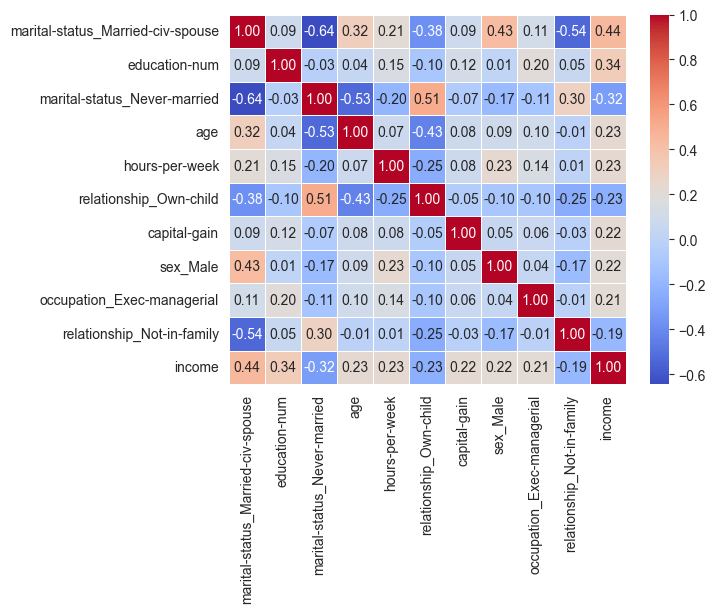

In [35]:
sns.heatmap(
    top_10_corr, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    linewidths=0.5,
)

# Machine Learning Classification

### Dataset Definition

In [36]:
X = df.drop("income", axis=1)
y = df["income"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42,
)

### Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42,
)

In [40]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [41]:
model.score(X_train, y_train)

0.8484720515970516

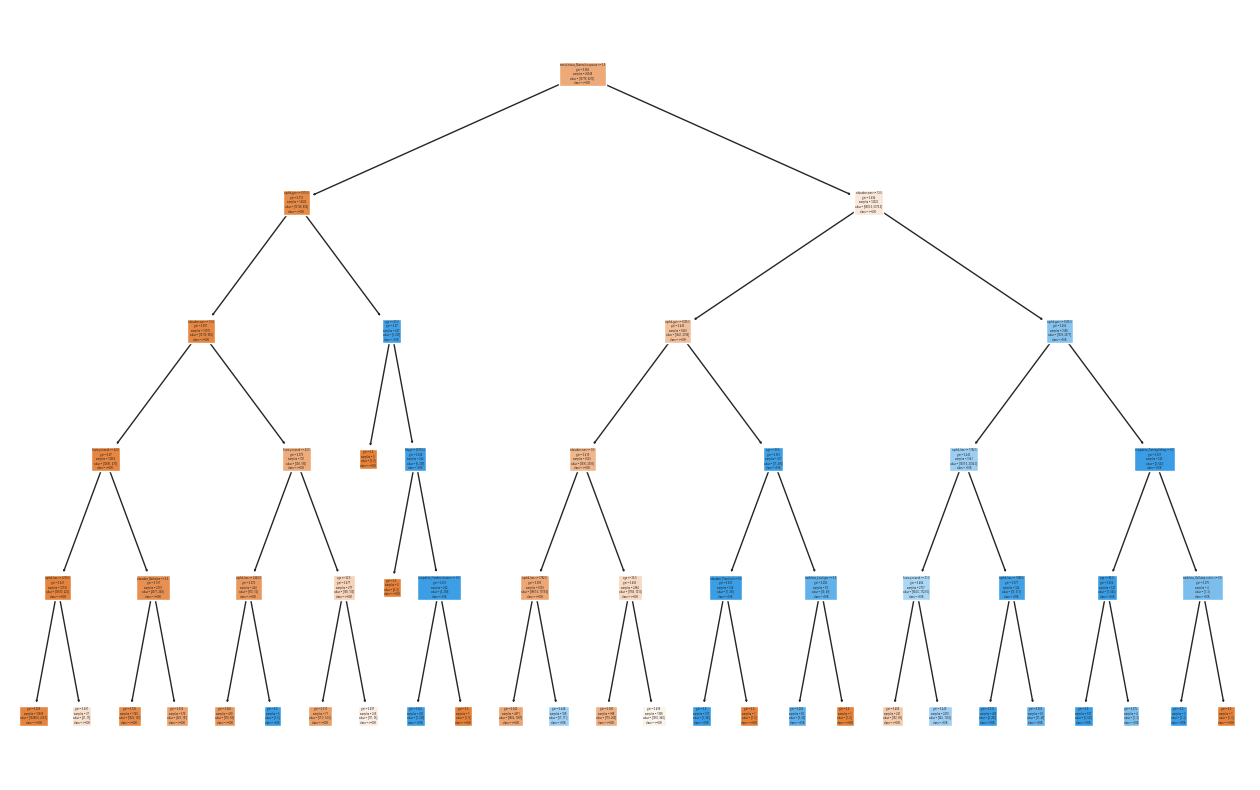

In [43]:
plt.figure(figsize=(16, 10))

plot_tree(
    model, 
    feature_names=X.columns, 
    class_names=['<=50K', '>50K'], 
    filled=True,
)

plt.show()

#### Feature Importacne

In [49]:
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df.head(10)

,Feature,Importance
30,marital-status_Married-civ-spouse,0.4720
2,education-num,0.2311
3,capital-gain,0.2154
4,capital-loss,0.0366
5,hours-per-week,0.0206
0,age,0.0174
22,education_Bachelors,0.0042
1,fnlwgt,0.0010
26,education_Preschool,0.0005
40,occupation_Handlers-cleaners,0.0005


#### Predict

In [50]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8504529402732995

In [51]:
confusion_matrix(y_test, y_pred)

array([[4724,  218],
       [ 756,  815]])

## 여러 알고리즘 결과 확인

(대상) Decision Tree, randomForest, SVM, XGB, LGBM

1. 위 알고리즘 중 가장 최적의 예측 성능을 보이는 알고리즘 확인 
    - Decision Tree는 위에서 적용한 버전 적용
    - SVM은 'rbf' 커널을 사용 -> SVC(kernel='rbf')
    - randomForest는 n_estimators = 100, max_depth = 5로 정의함
    - 현재 단계에서는 cross validation은 고려하지 않음  
2. 최적의 성능을 보이는 알고리즘의 feature importance 확인 
3. 최적의 모델에 대해서만 예측 성능 확인 (accuracy_score)

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [55]:
random_state = 42

#### 1. Models

In [56]:
models = {
    'DecisionTree': DecisionTreeClassifier(
        max_depth=5, 
        random_state=random_state,
    ),
    'RandomForest': RandomForestClassifier(
        n_estimators=100, # 생성 트리 개수 
        max_depth=5, 
        random_state=random_state,
    ),
    'SVM': SVC(
        kernel='rbf', 
        random_state=random_state,
    ),
    'XGBoost': XGBClassifier(
        use_label_encoder=False, 
        eval_metric='logloss', # 필수는 아님. 경고 메시지 처리 위해 추가한 옵션 
        random_state=random_state,
    ),
    'LGBM': LGBMClassifier(random_state=random_state)
}

In [57]:
best_model_name = None
best_accuracy = 0
best_model_instance = None

In [58]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name
        best_model_instance = model

print(f"\nBest Model: {best_model_name} with Accuracy: {best_accuracy:.4f}")

DecisionTree Accuracy: 0.8505
RandomForest Accuracy: 0.8457
SVM Accuracy: 0.7956


[16:32:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



XGBoost Accuracy: 0.8759
[LightGBM] [Info] Number of positive: 6270, number of negative: 19778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 747
[LightGBM] [Info] Number of data points in the train set: 26048, number of used features: 84
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240709 -> initscore=-1.148794
[LightGBM] [Info] Start training from score -1.148794
LGBM Accuracy: 0.8801

Best Model: LGBM with Accuracy: 0.8801


#### 2. Feature Importance

Best Model의 Feature Importance 확인 

In [59]:
if best_model_name in ['DecisionTree', 'RandomForest', 'XGBoost', 'LGBM']:
    feature_importances = best_model_instance.feature_importances_
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    print(f"\nFeature Importance - {best_model_name}:")
    print(importance_df.head(10))
else:
    print(f"\n{best_model_name} does not support feature importance.")


Feature Importance - LGBM:
                              Feature  Importance
0                                 age         495
1                              fnlwgt         428
3                        capital-gain         311
5                      hours-per-week         293
4                        capital-loss         255
2                       education-num         236
38         occupation_Exec-managerial          58
30  marital-status_Married-civ-spouse          52
44          occupation_Prof-specialty          51
53                  relationship_Wife          50


#### 3. Predict 

Best Model의 분류 성능 확인 

In [62]:
y_pred_best = best_model_instance.predict(X_test)
accuracy_score(y_test, y_pred_best)

0.8800859818823891

In [63]:
confusion_matrix(y_test, y_pred_best)

array([[4665,  277],
       [ 504, 1067]])

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

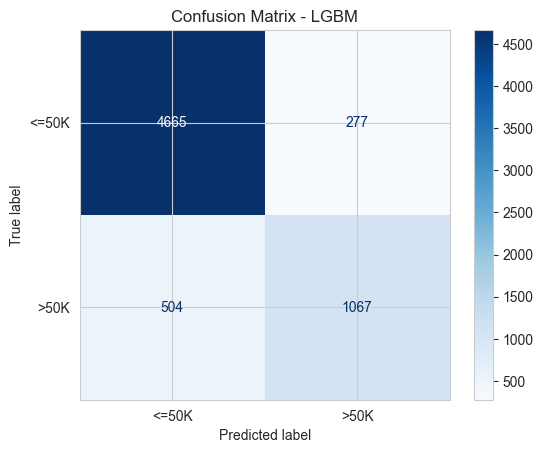

In [67]:
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['<=50K', '>50K'])

disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix - {best_model_name}")
plt.show()

-------------
** End of Docuemtns **